In [27]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline  


In [28]:
mat = scipy.io.loadmat('SonarAlt.mat')["sonarAlt"][0]
measures = np.arange(0,len(mat))

In [29]:
sensor_data = {
    "sample":measures,
    "sensor_data":mat}

In [30]:
data = pd.DataFrame(sensor_data)

measures = data.shape[0]
data["mov_avg_filter"] = np.zeros((measures,1))
data["low_pass_filter"] = np.zeros((measures,1))

window_size = 30

data.head(10)

,sample,sensor_data,mov_avg_filter,low_pass_filter
0,0,34.254913,0.0,0.0
1,1,33.602235,0.0,0.0
2,2,33.602235,0.0,0.0
3,3,33.602235,0.0,0.0
4,4,33.602235,0.0,0.0
5,5,34.254913,0.0,0.0
6,6,33.510678,0.0,0.0
7,7,33.419532,0.0,0.0
8,8,33.510678,0.0,0.0
9,9,34.254913,0.0,0.0


#### Moving Average Filter Implementation

In [31]:
for index in data["sample"]:

    if index + 1 <= window_size:
        data.loc[index,"mov_avg_filter"] = data.loc[index,"sensor_data"]
    else:
        current_measure = data.loc[index,"sensor_data"]
        measure_k_n = data.loc[index - window_size,"sensor_data"]
        data.loc[index,"mov_avg_filter"] = data.loc[index-1,"mov_avg_filter"] + ((current_measure - measure_k_n)/window_size)

data.head(10)

,sample,sensor_data,mov_avg_filter,low_pass_filter
0,0,34.254913,34.254913,0.0
1,1,33.602235,33.602235,0.0
2,2,33.602235,33.602235,0.0
3,3,33.602235,33.602235,0.0
4,4,33.602235,33.602235,0.0
5,5,34.254913,34.254913,0.0
6,6,33.510678,33.510678,0.0
7,7,33.419532,33.419532,0.0
8,8,33.510678,33.510678,0.0
9,9,34.254913,34.254913,0.0


#### 1st Low pass filter

##### $\alpha$ definition

In [41]:
alpha = 0.95

##### $1^{st}$ low pass filter implementation

In [42]:
for index in data["sample"]:
    if index >= 1:
        previous_estimate = data.loc[index-1,"low_pass_filter"] 
    else:
        previous_estimate = data.loc[index,"sensor_data"]
        
    data.loc[index,"low_pass_filter"] = alpha*previous_estimate + (1 - alpha)*data.loc[index,"sensor_data"]
    

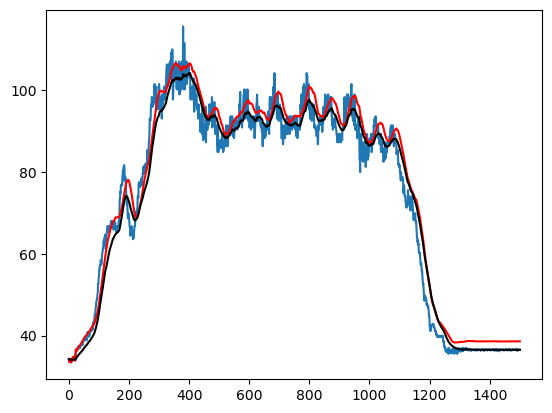

In [43]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["sample"],data["sensor_data"],label='sensor_data')
axes.plot(data["sample"],data["mov_avg_filter"],color='r', label="filtered signal")
axes.plot(data["sample"],data["low_pass_filter"], color="k")